In [78]:
#import Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

In [79]:
# Read Dataset
train=pd.read_csv('train_tweets.csv')
test=pd.read_csv('test_tweets.csv')

 Here I will only use train Dataset

In [80]:

train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [81]:
train.shape

(31962, 3)

In [82]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

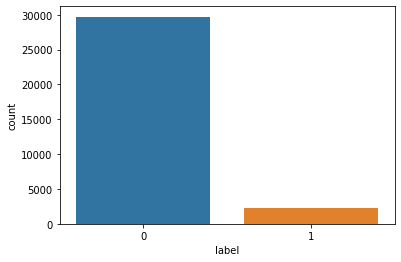

In [83]:
# look for Imabalanced Dataset
sns.countplot(train['label'])

In [84]:
# NLP libraries
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [85]:
# convert tweets into original form ( remove punctuations eg. # and @)
# remove stopwords (eg. the,her,him)
lm=WordNetLemmatizer()
corpus=[]
for i in range(0,len(train)):
    review=re.sub('[^a-zA-Z]',' ',train['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
    

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [87]:
# tweets covert into vectors by TF-IDF  
tfd=TfidfVectorizer(ngram_range=(1,3))
X_corpus=tfd.fit_transform(corpus)

In [88]:
#Oversampling for Imbalanced Data

from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X,y=os.fit_sample(X_corpus,train['label'])

In [89]:
labels=pd.DataFrame(y,columns=['label'])

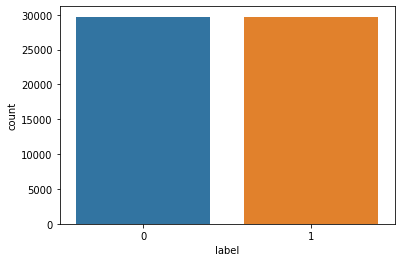

In [90]:
# we can see Balanced Data
sns.countplot(labels['label'])

In [91]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [92]:
# use Multinomial Naive bayes model hypertuning by GridSearchCV
naive=MultinomialNB()

param_grid={ 'alpha':[0.01,0.05,0.1,0.5,1,5,10]}
grid=GridSearchCV(naive,param_grid=param_grid,cv=5,n_jobs=-1)

In [93]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.01}
0.982524439851095


In [95]:
# got 98% accuracy with parameter alpha=0.01
# train the Final model
naive=MultinomialNB(alpha=0.01)
naive.fit(X_train,y_train)
y_pred=naive.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)

In [98]:
print(accuracy)

0.9855316285329744


In [99]:
matrix=confusion_matrix(y_test,y_pred)

In [100]:
matrix

array([[5816,  172],
       [   0, 5900]], dtype=int64)

In [ ]:
report=classification_report(y_test_y_pred)

In [ ]:
print(report)

In [ ]:
naive.coef_

In [ ]:
features=tfd.get_feature_names()

In [ ]:
features

In [ ]:
# Most Negative
sorted(zip(naive.coef_[0],features))[:20]

In [ ]:
# Most positive
sorted(zip(naive.coef_[0],features),reverse=True)[:20]